[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


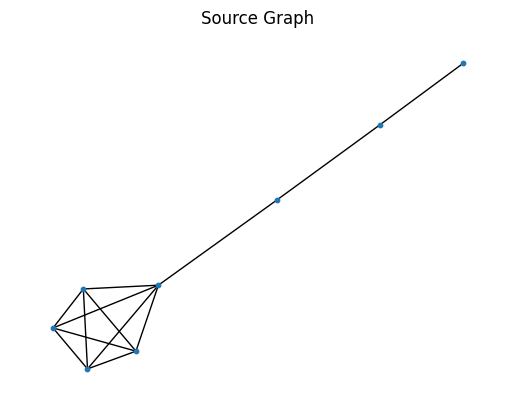

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


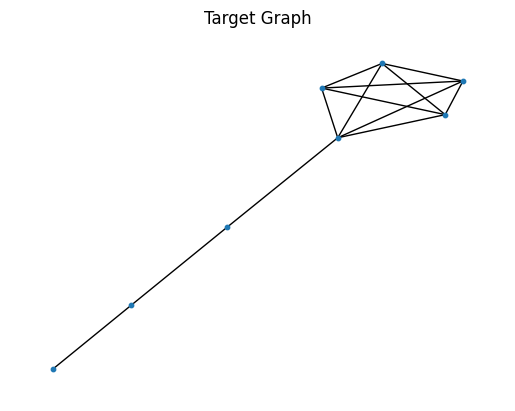

In [7]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# 加载保存的变量
with open('graph_data_lollipop.pkl', 'rb') as f:
    data = pickle.load(f)

cost_s_dense = data['cost_s_dense']
cost_t_dense = data['cost_t_dense']
pairs_idx = data['pairs_idx']
idx2node_s = data['idx2node_s']
idx2node_t = data['idx2node_t']

def visualize_graph(graph, idx2node, pairs_idx=None, title="Graph"):
    G = nx.Graph()
    
    # 假设 graph 是一个稀疏矩阵
    if isinstance(graph, csr_matrix):
        graph = graph.todense()
    
    # 现在 graph 应该是一个 numpy 矩阵
    for i in range(graph.shape[0]):
        for j in range(graph.shape[1]):
            if graph[i, j] > 0:  # assuming a weighted adjacency matrix
                G.add_edge(idx2node[i], idx2node[j], weight=graph[i, j])

    pos = nx.spring_layout(G)  # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=10)

    # edges
    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]
    print(weights)
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights)

    # labels
    # nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    # highlight matching pairs if provided
    if pairs_idx:
        matching_edges = [(idx2node[pair[0]], idx2node[pair[1]]) for pair in pairs_idx]
        nx.draw_networkx_edges(G, pos, edgelist=matching_edges, edge_color='r', width=2)

    plt.axis('off')
    plt.title(title)
    plt.show()


# 使用加载的数据进行可视化
visualize_graph(cost_s_dense, idx2node_s, pairs_idx, title="Source Graph")
visualize_graph(cost_t_dense, idx2node_t, pairs_idx, title="Target Graph")

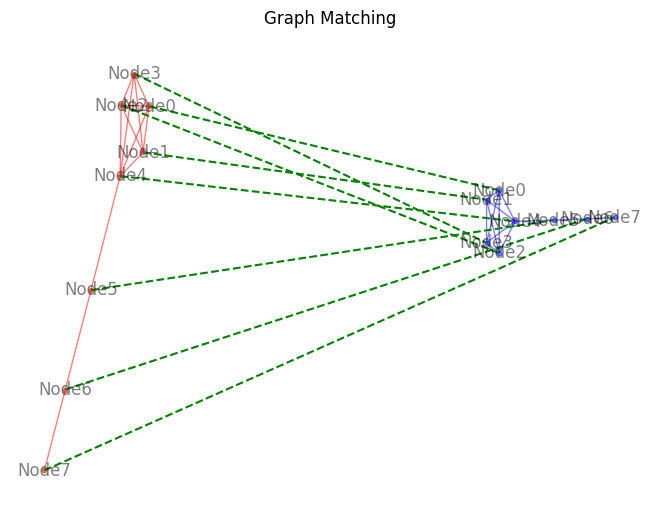

In [8]:
def visualize_match(cost_s, cost_t, matches, idx2node_s, idx2node_t, title="Graph Matching"):
    # 创建两个图形
    G_s = nx.from_numpy_array(cost_s)
    G_t = nx.from_numpy_array(cost_t)
    
    # 为了在一个平面上可视化两个图，我们把它们的位置稍微分开
    pos_s = nx.spring_layout(G_s)  # source图形的位置
    pos_t = {i: (x + 5, y) for i, (x, y) in enumerate(nx.spring_layout(G_t).values())}  # target图形的位置，我们通过加上一个固定的值来将其移开

    # 开始绘制source图形
    nx.draw(G_s, pos_s, with_labels=True, node_color='r', edge_color='r', node_size=10, alpha=0.5, labels=idx2node_s)

    # 绘制target图形
    nx.draw(G_t, pos_t, with_labels=True, node_color='b', edge_color='b', node_size=10, alpha=0.5, labels=idx2node_t)

    # 绘制匹配的边
    for s_idx, t_idx in matches:
        plt.plot([pos_s[s_idx][0], pos_t[t_idx][0]], [pos_s[s_idx][1], pos_t[t_idx][1]], 'g--')

    plt.title(title)
    plt.show()
# 假设 cost_s 和 cost_t 是你的图形邻接矩阵，已经转换为稠密格式
# pairs_idx 是一个包含匹配对的列表，例如 [(0, 2), (1, 3), ...]
# idx2node_s 和 idx2node_t 是索引到节点名的映射字典

# 调用可视化函数
visualize_match(cost_s_dense, cost_t_dense, pairs_idx, idx2node_s, idx2node_t)


In [9]:
with open('data/PPI_syn_database.pkl', 'rb') as f:
    database = pickle.load(f)

/tmp/ipykernel_2602197/1274946950.py:2: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  database = pickle.load(f)


In [10]:
for k, v in database.items():
    print(k)
    print(len(v))
    print(type(v[0]))


costs
6
<class 'scipy.sparse._csr.csr_matrix'>
probs
6
<class 'numpy.ndarray'>
idx2nodes
6
<class 'dict'>


In [11]:
import networkx as nx
import numpy as np
import pickle

# 创建棒棒糖图并生成对应的数据
def generate_lollipop_data(head_size, stick_length):
    # 创建棒棒糖图
    G = nx.lollipop_graph(head_size, stick_length)
    
    # 计算邻接矩阵
    adj_matrix = nx.adjacency_matrix(G).todense()
    
    # 创建节点的概率分布
    probs = np.full((adj_matrix.shape[0], 1), 1/adj_matrix.shape[0])
    
    # 创建索引到节点名称的映射
    idx2nodes = {i: f"Node_{i}" for i in range(adj_matrix.shape[0])}
    
    return {
        'costs': [adj_matrix],
        'probs': [probs],
        'idx2nodes': [idx2nodes]
    }

# 生成数据
lollipop_data = {
        'costs': [],
        'probs': [],
        'idx2nodes': []
    }
for i in range(6):
    data = generate_lollipop_data(head_size=5, stick_length=3)
    for k, v in data.items():
        lollipop_data[k].append(v[0])

# 保存数据为 .pkl 文件
with open('data/lollipop_data.pkl', 'wb') as f:
    pickle.dump(lollipop_data, f)

In [12]:
import networkx as nx
import numpy as np
import pickle
from scipy.sparse import csr_matrix

def generate_lollipop_data(n):
    database = {
        'costs': [],
        'probs': [],
        'idx2nodes': []
    }
    
    for _ in range(n):
        # Create a lollipop graph with m nodes in the complete graph part 
        # and n-m nodes in the path graph part
        m = 5  # number of nodes in the complete graph part
        k = 3  # number of nodes in the path graph part
        lollipop = nx.lollipop_graph(m, k)
        
        # Convert the graph to a CSR matrix format
        adj_matrix = nx.adjacency_matrix(lollipop)
        
        # Compute the degree of each node for the node distribution
        degrees = np.array([val for (node, val) in lollipop.degree()])
        node_distribution = degrees / degrees.sum()
        node_distribution = node_distribution.reshape(-1, 1)
        
        # Map the node index to a label (e.g., "Node0", "Node1", ...)
        idx2node = {idx: f"Node{idx}" for idx in range(len(lollipop.nodes()))}
        
        # Append the data to the corresponding lists in the database
        database['costs'].append(adj_matrix)
        database['probs'].append(node_distribution)
        database['idx2nodes'].append(idx2node)
        
    return database

# Generate the lollipop graph data
n = 6  # Generate 5 instances of lollipop graphs
lollipop_database = generate_lollipop_data(n)

# Save the generated data to a Pickle file
file_path = 'data/lollipop_graph_database.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(lollipop_database, f)

file_path


'data/lollipop_graph_database.pkl'